# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 11

**See PrairieLearn for _due date_ and _submission_**

## Submission instructions <a name="si"></a>
<hr>

_points: 4_

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4.
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024s/blob/main/docs/homework_instructions.md).


__Scoring metric: Accuracy__ (reason given below)

__Score of the best-performing model on the test set: 0.8232222222222222__

## Imports

In [1]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours". Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

_points: 3_

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

In [2]:
# Load the raw dataset
credit_raw_df = pd.read_csv("data/UCI_Credit_Card.csv", index_col=0)
credit_raw_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [3]:
# Take an initial glance of the dataset
print(credit_raw_df.shape)
credit_raw_df.describe()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


It appears that there are no missing values for any example in the raw dataset. However, I noticed some values that are not documented but still exist in certain features (for example, 0 in `PAY_0`). Additionally, a significant amount of data preprocessing is required. Many features in the raw dataset might be mistaken for numerical but are actually categorical, such as `SEX` and `PAY_0`. The first model that came to mind for this classification problem is logistic regression, and I am looking forward to seeing its performance in the end.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

_points: 2_

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=76`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [4]:
train_df, test_df = train_test_split(credit_raw_df, test_size = 0.3, random_state = 76)

X_train = train_df.drop(columns = ['default.payment.next.month'])
y_train = train_df['default.payment.next.month']
X_test = test_df.drop(columns = ['default.payment.next.month'])
y_test = test_df['default.payment.next.month']

print(X_train.shape)
print(X_test.shape)

(21000, 23)
(9000, 23)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

_points: 10_

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [5]:
summary = train_df.describe()
summary

# summary['BILL_AMT6']

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,167563.508571,1.604381,1.843905,1.554667,35.412952,-0.012190,-0.132714,-0.168333,-0.223143,-0.265762,...,43039.813952,40121.889810,38623.497095,5601.265286,6.059441e+03,5204.302571,4889.281333,4782.900857,5162.918714,0.221857
std,129919.112502,0.488995,0.789845,0.521970,9.136302,1.121864,1.196554,1.195375,1.165490,1.134210,...,63817.414980,60400.798292,59055.005208,16239.423781,2.407470e+04,16865.645456,16486.840852,15431.523094,17170.608569,0.415505
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2300.000000,1800.000000,1266.250000,1000.000000,8.200000e+02,390.000000,291.000000,257.750000,150.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18990.000000,18091.000000,17127.000000,2112.500000,2.009000e+03,1801.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54740.000000,50065.250000,48950.500000,5012.000000,5.000000e+03,4531.250000,4048.500000,4078.000000,4001.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,568638.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


Summary statistics:

- The mean amount of the bill statement in April 2005 is __38,623.50__ NT dollars, while the mean amount of the bill statement in September 2005 is __51,100.59__ NT dollars. These two summary statistics provide some insights into what subjects spent in those two months.
- Since the median for `EDUCATION` is __2__, we also observe that about half of the subjects in this dataset have received an education at least at the bachelor's degree level or higher.

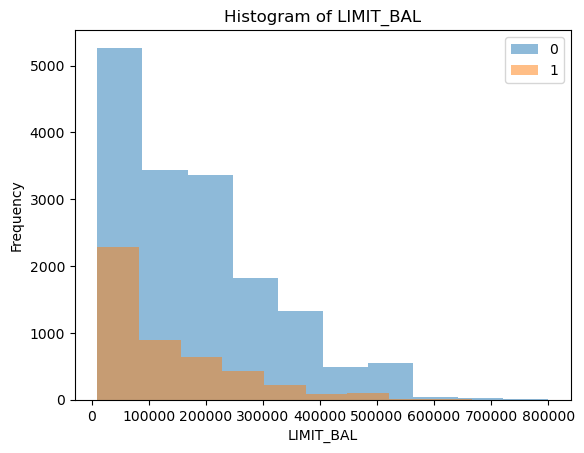

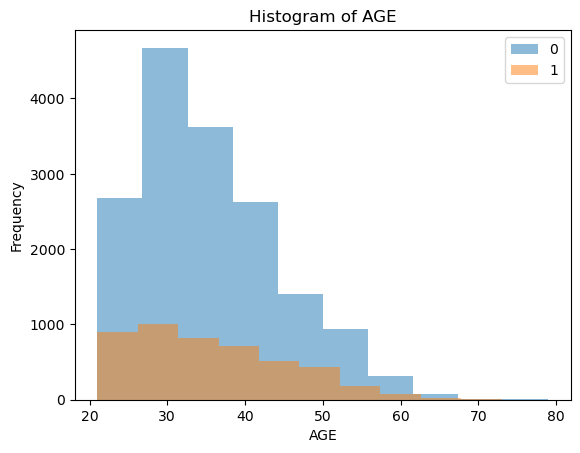

In [6]:
int_features = ['LIMIT_BAL', 'AGE']

for feature in int_features:
    ax = train_df.groupby("default.payment.next.month")[feature].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature)
    plt.title("Histogram of " + feature)
    plt.show()

default.payment.next.month
0    16341
1     4659
Name: count, dtype: int64


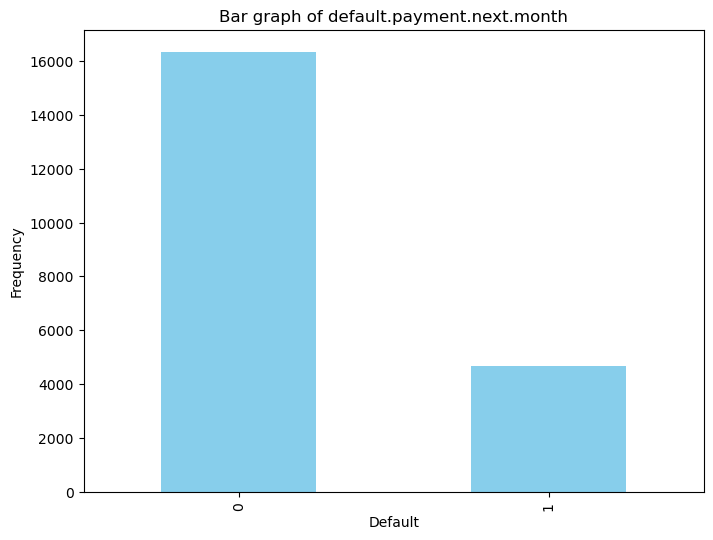

In [7]:
category_counts = train_df['default.payment.next.month'].value_counts()
print(category_counts)

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Default')
plt.ylabel('Frequency')
plt.title('Bar graph of default.payment.next.month')
plt.show()

Visualizations:

- From the first two histograms of the amount of given credit and age, we can see that the general trends are very similar for both the clients who defaulted on their payments and those who did not. This similarity suggests that these two features, `LIMIT_BAL` and `AGE`, may not carry as much weight as other features in our classification model that will be used to distinguish between the two groups of clients.
- From the bar graph of our target variable, `default.payment.next.month`, we observe that about $\frac{3}{4}$ of the data in our training set are from clients who did not default. This provides us with a better overall understanding of our training set.

Summary:

By reviewing the bar graph of our target variable, we see there is indeed a class imbalance. However, without any context, both classes could be equally important. Therefore, we are still going to use __Accuracy__ as our assessment metric.

In [8]:
# Set the scoring_metric we will be using throughout this project
scoring_metric = "accuracy"

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

_points: 10_

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

In [9]:
numeric_features = ["LIMIT_BAL", 
                    "AGE", 
                    "BILL_AMT1", 
                    "BILL_AMT2", 
                    "BILL_AMT3", 
                    "BILL_AMT4", 
                    "BILL_AMT5", 
                    "BILL_AMT6", 
                    "PAY_AMT1", 
                    "PAY_AMT2", 
                    "PAY_AMT3", 
                    "PAY_AMT4", 
                    "PAY_AMT5", 
                    "PAY_AMT6"
                   ]

binary_features = ["SEX"]

ordinal_features_ed = ['EDUCATION']
education_levels = [1, 2, 3, 4, 5, 6]

categorical_features = ["MARRIAGE"]

ordinal_features_repay = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
ordering = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
repay_ordering = [ordering] * len(ordinal_features_repay)

In [10]:
numeric_transformer = StandardScaler()
binary_transformer = OneHotEncoder(drop = "if_binary", dtype = int, sparse_output = False)
edu_ordinal_transformer = OrdinalEncoder(categories = [education_levels], dtype = int, handle_unknown='use_encoded_value', unknown_value=-1)
categorical_transformer = OneHotEncoder(handle_unknown = "ignore", sparse_output = False)
repay_ordinal_transformer = OrdinalEncoder(categories = repay_ordering, dtype = int, handle_unknown='use_encoded_value', unknown_value=-1)

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (binary_transformer, binary_features),
    (edu_ordinal_transformer, ordinal_features_ed),
    (categorical_transformer, categorical_features),
    (repay_ordinal_transformer, ordinal_features_repay)
)

preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('onehotencoder-1',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>,
                                               sparse_output=False),
                                 ['SEX']),
                                ('ordinalencoder-1',
                                 Ordin...
                                               sparse_output=False),
                                 ['MARRIAGE']),
                                ('ordinalencoder-2',
                                 OrdinalEncoder(categories=[[-1, 0, 1, 2, 3, 4,
                                                             5, 6, 7, 8, 9],
                                                            [-1, 0, 1, 2, 3, 4,
                                                             5, 6, 7, 8, 9],
                                                            [-1, 0, 1, 2, 3, 4,
                                                             5, 6, 7, 8, 9],
                                                            [-1, 0, 1, 2, 3, 4,
                                                             5, 6, 7, 8, 9],
                                                            [-1, 0, 1, 2, 3, 4,
                                                             5, 6, 7, 8, 9],
                                                            [-1, 0, 1, 2, 3, 4,
                                                             5, 6, 7, 8, 9]],
                                                dtype=<class 'int'>,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6'])])

<!-- END QUESTION -->

<br><br>

#### There are some extra preparations that we need to do before fitting different models:

In [11]:
# dictionary to store all the results
results = {} 

In [12]:
# The function calls cross_validate with the passed arguments and 
# returns a series with mean cross-validation results and std of cross-validation (adapted from hw3)
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

_points: 2_

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [13]:
pipe_dummy = make_pipeline(preprocessor, DummyClassifier(random_state = 136))

results["Dummy"] = mean_std_cross_val_scores(
    pipe_dummy, X_train, y_train, cv = 5, return_train_score = True, scoring = scoring_metric
)

pd.DataFrame(results).T

/var/folders/my/q7bzw0y97qj5yxmtqcc_pm0r0000gn/T/ipykernel_5721/1033024002.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
Dummy,0.015 (+/- 0.001),0.005 (+/- 0.000),0.778 (+/- 0.000),0.778 (+/- 0.000)


<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>

_points 10_

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

#### First attempt:

In [14]:
# First trial of using logistic regression (using default hyperparameter setting in LogisticRegression())
pipe_logistic_trial = make_pipeline(preprocessor, LogisticRegression())
logistic_trial_scores = cross_validate(pipe_logistic_trial, X_train, y_train, cv = 5, return_train_score = True)
pd.DataFrame(logistic_trial_scores)

,fit_time,score_time,test_score,train_score
0,0.051264,0.004892,0.806429,0.811012
1,0.046820,0.004812,0.816667,0.808155
2,0.047486,0.004680,0.810952,0.810298
3,0.044311,0.004721,0.811905,0.810536
4,0.045759,0.004599,0.805476,0.811310


#### Revisit the model & Tune the hyperparameter C through cross-validation:

In [15]:
# Now, we are going to carry out hyperparameter tuning of our interested hyperparameter C
pipe_logistic_tune = make_pipeline(preprocessor, LogisticRegression())

param_grid = {
    "logisticregression__C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

gs_logistic = GridSearchCV(
    pipe_logistic_tune,
    param_grid = param_grid,
    n_jobs = -1,
    return_train_score = True,
    scoring = scoring_metric
)
gs_logistic.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6']),
                                                                        ('onehotencoder-1',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       dtype=<class 'i...
                                                                                                     1,
                                                                                                     2,
                                                                                                     3,
                                                                                                     4,
                                                                                                     5,
                                                                                                     6,
                                                                                                     7,
                                                                                                     8,
                                                                                                     9],
                                                                                                    [-1,
                                                                                                     0,
                                                                                                     1,
                                                                                                     2,
                                                                                                     3,
                                                                                                     4,
                                                                                                     5,
                                                                                                     6,
                                                                                                     7,
                                                                                                     8,
                                                                                                     9]],
                                                                                        dtype=<class 'int'>,
                                                     

In [16]:
# Rank the values of C based on their corresponding experiment's mean cross-validation score
relevant = [
    "rank_test_score",
    "param_logisticregression__C",
    "mean_test_score",
    "std_test_score",
    "mean_train_score",
    "std_train_score"
]
pd.DataFrame(gs_logistic.cv_results_)[relevant].set_index("rank_test_score").sort_index().T

rank_test_score,1,2,3,3,3,6,7,8,9
param_logisticregression__C,100,10,1,1000,10000,0.1,0.01,0.001,0.0001
mean_test_score,0.810381,0.810333,0.810286,0.810286,0.810286,0.81,0.809381,0.800238,0.780905
std_test_score,0.003957,0.004087,0.004045,0.003925,0.003925,0.004049,0.004479,0.005894,0.001561
mean_train_score,0.810286,0.810262,0.810262,0.810262,0.810274,0.810226,0.808964,0.800429,0.780845
std_train_score,0.001058,0.001057,0.001111,0.001022,0.001021,0.00108,0.001167,0.001407,0.000311


Summary:

We tried 9 distinct C values for the logistic regression model. Among these experiments, __C=100__ yielded the highest mean cross-validation score. Notice that when C=100, the mean cross-validation score is very close to the mean training score; in fact, this is true for all values of C we tried. Lastly, we observe that the standard deviation for all experiments is very small, approximately 0.001.

In [17]:
# As a final step, let us add the result of our best-performing logistic regression model to our results dictionary
pipe_logistic_best = make_pipeline(preprocessor, LogisticRegression(C = 100))

results["Logistic"] = mean_std_cross_val_scores(
    pipe_logistic_best, X_train, y_train, cv = 5, return_train_score = True, scoring = scoring_metric
)

pd.DataFrame(results).T

/var/folders/my/q7bzw0y97qj5yxmtqcc_pm0r0000gn/T/ipykernel_5721/1033024002.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
Dummy,0.015 (+/- 0.001),0.005 (+/- 0.000),0.778 (+/- 0.000),0.778 (+/- 0.000)
Logistic,0.050 (+/- 0.004),0.005 (+/- 0.001),0.810 (+/- 0.004),0.810 (+/- 0.001)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

_points: 12_

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_7
    
</div>

##### 1. DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

pipe_dt = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state = 136)
)

dt_cross_val_results = pd.DataFrame(
    cross_validate(pipe_dt, X_train, y_train, return_train_score = True)
)
dt_cross_val_results.mean()

fit_time       0.277704
score_time     0.005415
test_score     0.717905
train_score    0.999619
dtype: float64

##### 2. RandomForestClassifier

In [19]:
pipe_rf = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_jobs = -1, random_state = 136)
)
rf_cross_val_results = pd.DataFrame(
    cross_validate(pipe_rf, X_train, y_train, return_train_score = True)
)
rf_cross_val_results.mean()

fit_time       0.698726
score_time     0.030467
test_score     0.817667
train_score    0.999583
dtype: float64

##### 3. Gradient boosted trees - LightGBM

In [20]:
from lightgbm.sklearn import LGBMClassifier

pipe_lgbm = make_pipeline(
    preprocessor, 
    LGBMClassifier(random_state=136, verbose=-1)
)
lgbm_cross_val_results = pd.DataFrame(
    cross_validate(pipe_lgbm, X_train, y_train, return_train_score = True)
)
lgbm_cross_val_results.mean()

fit_time       0.358035
score_time     0.009733
test_score     0.817095
train_score    0.851488
dtype: float64

__Summary__

- __DecisionTreeClassifier__: Even though the train score is very close to 1, the test score is only about 0.718. Such a gap indicates a high chance of encountering an overfitting issue with this model. Moreover, this is the simplest model among all three; we would expect it to have the fastest fit time, and it does. Lastly, its test score is only around 0.718. Thus, there is still some distance between this model and our previous logistic regression model.
- __RandomForestClassifier__: Given that the train score is approximately 0.9996, while the test score is only around 0.828, this model is also very likely to encounter overfitting. Both the fit time and the score time rank last among our three different models. Nevertheless, it performs slightly better than logistic regression in terms of the testing score, albeit at the expense of longer fit time and score time.
- __LightGBM__: Since there is only a small gap between the test score and the train score, and both scores are reasonable, this model may not encounter severe overfitting or underfitting. It has the second shortest fitting time among all three models, a bit faster compared to RandomForestClassifier. Additionally, its test score is also slightly better compared to the logistic regression model.

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

_points: 10_

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_8
    
</div>

#### Tune `max_depth` and `max_features` in DecisionTreeClassifier

In [21]:
pipe_dt_tune = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state = 136)
)

param_grid = {
    "decisiontreeclassifier__max_depth": [1, 3, 5, 10, 15],
    "decisiontreeclassifier__max_features": [3, 5, 7, 9, 11, 13, 15]
}

gs_dt = GridSearchCV(
    pipe_dt_tune,
    param_grid = param_grid,
    n_jobs = -1,
    return_train_score = True,
    scoring = scoring_metric,
)
gs_dt.fit(X_train, y_train)
print(gs_dt.best_params_)
print("Best accuracy:", gs_dt.best_score_)

{'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__max_features': 11}
Best accuracy: 0.8194285714285714


#### Tune `n_estimators` and `max_depth` in RandomForestClassifier

In [22]:
pipe_rf_tune = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_jobs = -1, random_state = 136)
)

param_grid = {
    "randomforestclassifier__n_estimators": [1, 5, 10, 25, 50, 80, 100],
    "randomforestclassifier__max_depth": [5, 10, 15]
}

gs_rf = GridSearchCV(
    pipe_rf_tune,
    param_grid = param_grid,
    n_jobs = -1,
    return_train_score = True,
    scoring = scoring_metric
)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_params_)
print("Best accuracy:", gs_rf.best_score_)

{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 100}
Best accuracy: 0.8192380952380953


#### Tune `eta`, `n_estimators` and `max_depth` in LightGBM

In [23]:
pipe_lgbm_tune = make_pipeline(
    preprocessor, 
    LGBMClassifier(random_state=136, verbose=-1)
)

param_grid = {
    "lgbmclassifier__eta": [0.001, 0.01, 0.1, 0.3, 0.5],
    "lgbmclassifier__n_estimators": [1, 5, 10, 25, 50, 80, 100],
    "lgbmclassifier__max_depth": [5, 10, 15]
}

rs_lgbm = RandomizedSearchCV(
    pipe_lgbm_tune,
    param_distributions = param_grid,
    n_iter = 30,
    n_jobs = -1,
    return_train_score = True,
    scoring = scoring_metric,
    random_state=136
)
rs_lgbm.fit(X_train, y_train)
print(rs_lgbm.best_params_)
print("Best accuracy:", rs_lgbm.best_score_)

{'lgbmclassifier__n_estimators': 50, 'lgbmclassifier__max_depth': 5, 'lgbmclassifier__eta': 0.3}
Best accuracy: 0.8204285714285714


#### Put together all the optimal models after tuning their hyperparameters:

In [24]:
pipe_dt_best = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth = 3, max_features = 11, random_state = 163))
results["DecisionTreeClassifier"] = mean_std_cross_val_scores(
    pipe_dt_best, X_train, y_train, cv = 5, return_train_score = True, scoring = scoring_metric
)

pipe_rf_best = make_pipeline(preprocessor, RandomForestClassifier(max_depth = 10, n_estimators = 100, n_jobs = -1, random_state = 163))
results["RandomForestClassifier"] = mean_std_cross_val_scores(
    pipe_rf_best, X_train, y_train, cv = 5, return_train_score = True, scoring = scoring_metric
)

pipe_lgbm_best = make_pipeline(preprocessor, LGBMClassifier(eta = 0.3, max_depth = 5, n_estimators = 50, n_jobs = -1, verbose=-1, random_state = 163))
results["LightGBM"] = mean_std_cross_val_scores(
    pipe_lgbm_best, X_train, y_train, cv = 5, return_train_score = True, scoring = scoring_metric
)

pd.DataFrame(results).T

/var/folders/my/q7bzw0y97qj5yxmtqcc_pm0r0000gn/T/ipykernel_5721/1033024002.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/my/q7bzw0y97qj5yxmtqcc_pm0r0000gn/T/ipykernel_5721/1033024002.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/my/q7bzw0y97qj5yxmtqcc_pm0r0000gn/T/ipykernel_5721/1033024002.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

,fit_time,score_time,test_score,train_score
Dummy,0.015 (+/- 0.001),0.005 (+/- 0.000),0.778 (+/- 0.000),0.778 (+/- 0.000)
Logistic,0.050 (+/- 0.004),0.005 (+/- 0.001),0.810 (+/- 0.004),0.810 (+/- 0.001)
DecisionTreeClassifier,0.038 (+/- 0.001),0.005 (+/- 0.000),0.811 (+/- 0.003),0.814 (+/- 0.004)
RandomForestClassifier,0.438 (+/- 0.008),0.020 (+/- 0.000),0.820 (+/- 0.001),0.863 (+/- 0.001)
LightGBM,0.138 (+/- 0.002),0.006 (+/- 0.000),0.820 (+/- 0.003),0.835 (+/- 0.002)


<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>
<hr>

_points: 10_

**Your tasks:**

1. Try your best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

<div class="alert alert-warning">
    
Solution_9
    
</div>

#### We are going to use LightGBM since it gives us the best score on the train dataset.

In [25]:
pipe_lgbm_best.fit(X_train, y_train)
test_score = pipe_lgbm_best.score(X_test, y_test)
print("Score of the best-performing model on the test set:", test_score)

Score of the best-performing model on the test set: 0.8232222222222222


Having a test score of 0.8232 means that by using our best-performing model, `LightGBM`, we successfully classify around 82.3% of the examples in the test set. 

Yes, this test score (0.8232) agrees with the mean validation score (0.820). Given the size of our training data, which includes 21,000 examples, our model is built on a fairly large training set. Therefore, the likelihood of optimization bias or overfitting of the validation set is relatively small. As a result, we conclude that our results are fairly trustworthy.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>

_points 12_

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_10
    
</div>

In [26]:
# All models' results after tunning their hyperparameters
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.015 (+/- 0.001),0.005 (+/- 0.000),0.778 (+/- 0.000),0.778 (+/- 0.000)
Logistic,0.050 (+/- 0.004),0.005 (+/- 0.001),0.810 (+/- 0.004),0.810 (+/- 0.001)
DecisionTreeClassifier,0.038 (+/- 0.001),0.005 (+/- 0.000),0.811 (+/- 0.003),0.814 (+/- 0.004)
RandomForestClassifier,0.438 (+/- 0.008),0.020 (+/- 0.000),0.820 (+/- 0.001),0.863 (+/- 0.001)
LightGBM,0.138 (+/- 0.002),0.006 (+/- 0.000),0.820 (+/- 0.003),0.835 (+/- 0.002)


__Final concluding remarks and discussions:__

I have printed out the dataframe that exhibits all the results from our models after tuning their hyperparameters. It is fair to say that, except for the dummy classifier, the mean validation scores of all other models are not significantly different. However, the `RandomForestClassifier` and `LightGBM` show slightly better scores. It is also worth noting that these two models have considerably longer fit times compared to the other models.

Due to the relatively long running times, we did not test many hyperparameter values for the `RandomForestClassifier` and `LightGBM`. Increasing the combinations of their hyperparameters could likely improve their performance. Additionally, we could apply feature engineering to manipulate our existing variables, creating more meaningful features that may enhance our models' performance. Finally, to improve model interpretability, we could try SHAP force plots, which provide a more vivid visualization of our classification procedure.

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using PrairieLearn.
4. Make sure that the plots and output are rendered properly in your submitted file.

This was a tricky one but you did it!